In [1]:
import pandas as pd
import geopandas as gpd

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

import plotly.express as px
import plotly.io as pio

In [2]:
data = xr.open_dataset("../data/delhi_cpcb_2022.nc")
df = data.to_dataframe().reset_index().set_index("time")
df = df["2022-01-01":"2022-12-31"].reset_index().sort_values(by=["time", "station"])
df.head(2)

/tmp/ipykernel_3286569/1740613548.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df = df["2022-01-01":"2022-12-31"].reset_index().sort_values(by=["time", "station"])


,time,station,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,...,RH,WS,WD,SR,BP,AT,RF,TOT-RF,latitude,longitude
0,2022-01-01 00:30:00,"Alipur, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,219.50,342.75,94.73,53.95,105.95,3.78,...,79.75,NaN,205.95,4.60,999.10,6.85,0.0,0.0,28.815329,77.153010
8760,2022-01-01 00:30:00,"Anand Vihar, Delhi - DPCC",2022-01-01,2022-01-01 01:00:00,613.25,NaN,406.70,104.50,387.18,30.10,...,84.15,0.3,173.00,8.95,974.98,11.95,NaN,0.0,28.647622,77.315809


In [3]:
stations_df = df.drop_duplicates(subset=["station"])[["station", "latitude", "longitude"]]
stations_df

,station,latitude,longitude
0,"Alipur, Delhi - DPCC",28.815329,77.153010
8760,"Anand Vihar, Delhi - DPCC",28.647622,77.315809
17520,"Ashok Vihar, Delhi - DPCC",28.695381,77.181665
26280,"Aya Nagar, Delhi - IMD",28.470691,77.109936
35040,"Bawana, Delhi - DPCC",28.776200,77.051074
43800,"Burari Crossing, Delhi - IMD",28.725650,77.201157
52560,"CRRI Mathura Road, Delhi - IMD",28.551201,77.273574
61320,"Chandni Chowk, Delhi - IITM",28.656756,77.227234
70080,"DTU, Delhi - CPCB",28.750050,77.111261
78840,"Dr. Karni Singh Shooting Range, Delhi - DPCC",28.498571,77.264840


## Plot spatial map of stations

In [22]:
fig = px.scatter_mapbox(
    stations_df,
    lat="latitude",
    lon="longitude",
    hover_name="station",
    hover_data=["station"],
    height=800,
    width=1000,
    center={"lat": 28.7041, "lon": 77.1025},
    mapbox_style="carto-positron",
    title="Delhi Stations",
)
fig.show()

## Visualize spatial correlation of stations

### Drop stations with lots of missing data

In [5]:
clean_df = df.dropna(subset="PM2.5")
fraction_df = clean_df.station.value_counts()/(365*24)
fraction_df

Rohini, Delhi - DPCC                                0.993607
Okhla Phase-2, Delhi - DPCC                         0.991210
Dr. Karni Singh Shooting Range, Delhi - DPCC        0.986073
Bawana, Delhi - DPCC                                0.985845
Nehru Nagar, Delhi - DPCC                           0.983333
Dwarka-Sector 8, Delhi - DPCC                       0.979795
IGI Airport (T3), Delhi - IMD                       0.979452
Major Dhyan Chand National Stadium, Delhi - DPCC    0.977740
Anand Vihar, Delhi - DPCC                           0.975799
R K Puram, Delhi - DPCC                             0.975685
Mundka, Delhi - DPCC                                0.975571
Sri Aurobindo Marg, Delhi - DPCC                    0.973744
CRRI Mathura Road, Delhi - IMD                      0.973744
Alipur, Delhi - DPCC                                0.970434
Lodhi Road, Delhi - IMD                             0.969977
North Campus, DU, Delhi - IMD                       0.969178
Jahangirpuri, Delhi - DP

In [6]:
clean_df = clean_df[clean_df.station.isin(fraction_df[fraction_df > 0.95].index)]

clean_df.station.value_counts().shape

(23,)

## Plot correlations

In [7]:
station_dict = dict(stations_df.set_index("station").to_dict(orient="index"))

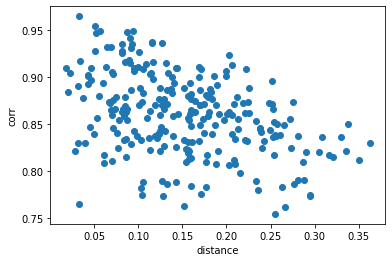

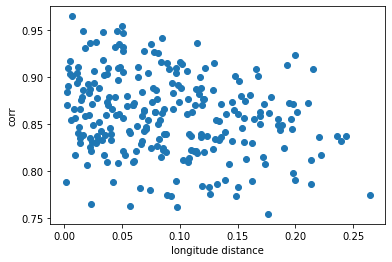

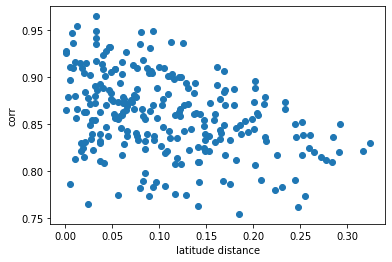

In [8]:
pivot_df = pd.pivot_table(clean_df, columns='station', index='time', values='PM2.5')
corr_df = pivot_df.corr()
def get_distance(station1, station2):
    return np.sqrt((station_dict[station1]["longitude"] - station_dict[station2]["longitude"])**2 + (station_dict[station1]["latitude"] - station_dict[station2]["latitude"])**2)

def get_lat_diff(station1, station2):
    return np.abs(station_dict[station1]["latitude"] - station_dict[station2]["latitude"])

def get_lon_diff(station1, station2):
    return np.abs(station_dict[station1]["longitude"] - station_dict[station2]["longitude"])

dists = []
lon_dists = []
lat_dists = []
corrs = []
for station1 in corr_df.columns:
    for station2 in corr_df.columns:
        if station1 != station2:
            dist = get_distance(station1, station2)
            corr = corr_df.loc[station1, station2]
            dists.append(dist)
            corrs.append(corr)
            lon_dists.append(get_lon_diff(station1, station2))
            lat_dists.append(get_lat_diff(station1, station2))
        else:
            break
            
plt.figure();plt.scatter(dists, corrs);plt.xlabel("distance");plt.ylabel("corr")
plt.figure();plt.scatter(lon_dists, corrs);plt.xlabel("longitude distance");plt.ylabel("corr")
plt.figure();plt.scatter(lat_dists, corrs);plt.xlabel("latitude distance");plt.ylabel("corr");